In [2]:
!pip install matplotlib_inline

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import matplotlib_inline
import random

In [2]:
attributes = ['joy','trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation']
#levels = ["no ", "a little bit ", "", "very "]
#'allcharlinepairs-withDataCleaning-withPlutchikVoting-v1.csv'
dataDevPlutchik = pd.read_csv('allcharlinepairs.csv')
dataDevPlutchik['plutchik'] = [ast.literal_eval(x) for x in dataDevPlutchik['plutchik']]
print(dataDevPlutchik['plutchik'][0], len(dataDevPlutchik['plutchik'][0]))

{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': 1, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 2} 8


In [3]:
results = dict()

currid = dataDevPlutchik['storyid'][0]
counter = 0
labels = []
emotions = []
ans = []
err = 0
trainset = []
while(counter < len(dataDevPlutchik)):
    tcounter = 0
    while(dataDevPlutchik['storyid'][counter + tcounter]==currid):
        tstr = ""
        for k in dataDevPlutchik['plutchik'][counter+tcounter].keys():
            tstr += str(dataDevPlutchik['plutchik'][counter+tcounter][k])
            
        
        tcounter += 1
        if(counter + tcounter >= len(dataDevPlutchik)):
            break
        
        if(tstr != ''):
            if(tstr not in results.keys()):
                results[tstr] = [0 for u in range(9)]
            results[tstr][8] += 1
            tstr1 = ""
            for k in dataDevPlutchik['plutchik'][counter+tcounter].keys():
                if(int(dataDevPlutchik['plutchik'][counter+tcounter][k]) > 0):
                    tstr1 += '1'
                    num = attributes.index(k)
                    results[tstr][num] += 1
                else:
                    tstr1 += '0'
            trainset.append(tstr+' '+tstr1)
                
    if(counter + tcounter >= len(dataDevPlutchik)):
        break
    currid = dataDevPlutchik['storyid'][counter+tcounter]
    counter += tcounter
print(len(results))

print(results)

2001
{'21010002': [116, 87, 24, 76, 23, 12, 14, 112, 138], '23000002': [3, 2, 1, 3, 2, 0, 2, 4, 5], '11000001': [80, 62, 27, 56, 27, 20, 23, 88, 122], '00130320': [0, 0, 0, 1, 1, 1, 1, 0, 1], '00012310': [0, 0, 0, 0, 1, 1, 0, 0, 1], '00002100': [7, 4, 2, 2, 3, 3, 3, 7, 11], '10001001': [11, 7, 6, 11, 10, 2, 3, 12, 20], '20010001': [66, 40, 18, 40, 11, 11, 13, 64, 84], '32000000': [18, 11, 5, 9, 6, 3, 4, 17, 23], '20000000': [119, 84, 39, 83, 46, 34, 35, 121, 185], '00000120': [6, 2, 5, 10, 5, 9, 10, 7, 14], '00000020': [4, 2, 6, 9, 7, 6, 10, 7, 12], '11112111': [1, 1, 0, 0, 0, 0, 1, 1, 2], '10000010': [7, 2, 1, 5, 1, 3, 4, 7, 10], '20010000': [39, 23, 10, 20, 11, 6, 3, 36, 54], '22010002': [84, 68, 14, 56, 14, 8, 12, 88, 102], '21000001': [240, 171, 67, 147, 66, 46, 50, 233, 319], '21000002': [183, 131, 52, 115, 50, 33, 27, 190, 246], '10211102': [0, 0, 1, 0, 1, 0, 1, 1, 1], '00201011': [1, 1, 2, 2, 2, 2, 2, 2, 3], '21010001': [182, 127, 39, 126, 40, 28, 24, 178, 238], '22020002': [16,

In [4]:
trainset

['21010002 11000001',
 '23000002 11000001',
 '11000001 00110110',
 '00130320 00011110',
 '00012310 00001100',
 '00002100 10001001',
 '10001001 10010001',
 '20010001 11000000',
 '32000000 10000000',
 '20000000 00000110',
 '00000120 00000010',
 '00000020 11111111',
 '11112111 10000010',
 '10000010 10010000',
 '20010000 10000000',
 '20000000 10000000',
 '20000000 11010001',
 '22010002 11000001',
 '21000001 11000001',
 '21000002 10111101',
 '10211102 00101011',
 '00201011 11010001',
 '21010001 11010001',
 '22010002 11010001',
 '22020002 00101111',
 '00302121 00101101',
 '00203101 10111001',
 '20111002 11100001',
 '21100001 11000001',
 '21000001 10000001',
 '10000002 10000001',
 '10000003 10010000',
 '30010000 00111111',
 '00222221 10111000',
 '10122000 00111001',
 '00211001 10010001',
 '20010001 01100001',
 '01100003 00110000',
 '00120000 11010000',
 '22010000 11000000',
 '21000000 10000000',
 '30000000 11000000',
 '21000000 10000001',
 '20000002 11000001',
 '21000003 11111111',
 '22121112

In [4]:
display = []
values = [[] for i in range(8)]

for k in results.keys():
    if(results[k][8] > 20):
        display.append(k)
        for u in range(len(results[k])-1):
            values[u].append(results[k][u]/results[k][8])
        
print(len(display) == len(values[0]))

True


In [5]:
len(display)

105

In [6]:
valuewithnames = []
for i in range(len(values)):
    tmpresults = list(zip(display, values[i]))
    tmpresults.sort(key = lambda x: x[1])
    valuewithnames.append(tmpresults)

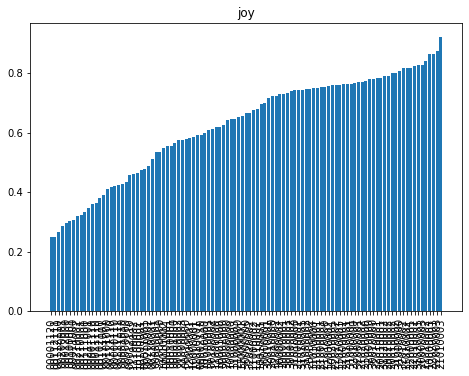

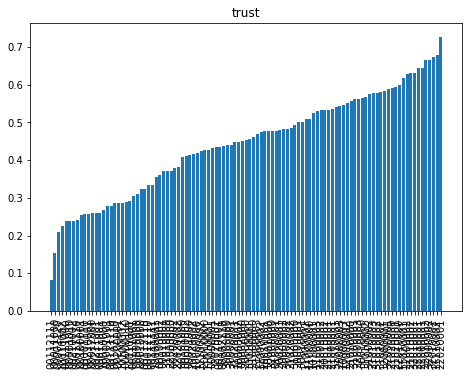

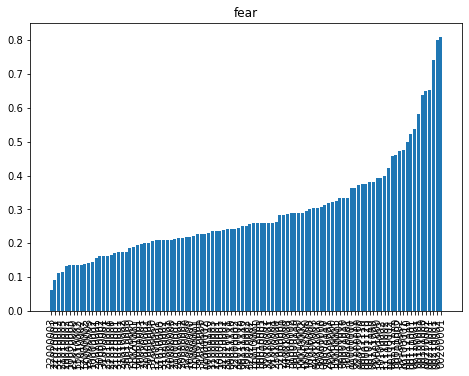

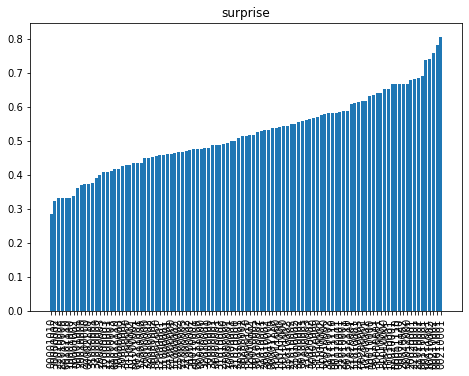

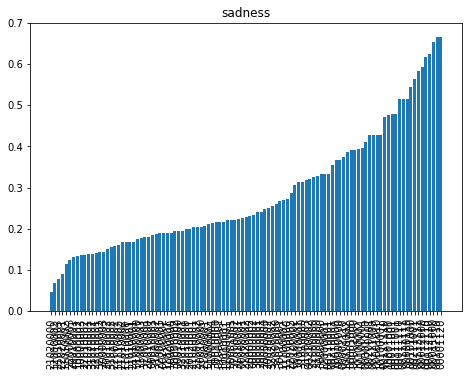

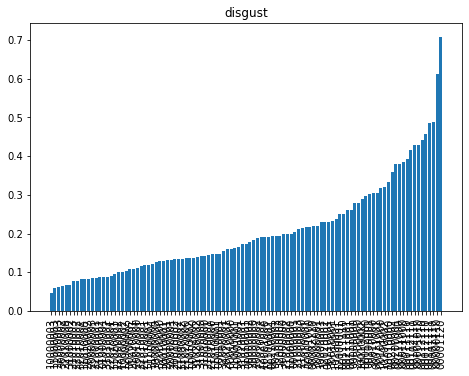

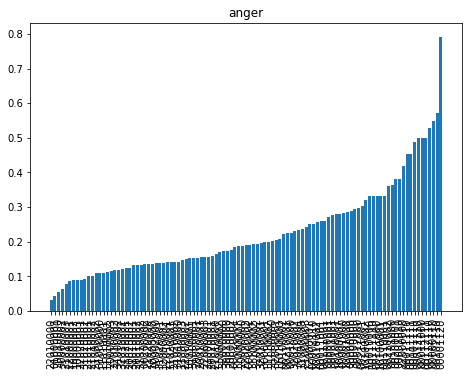

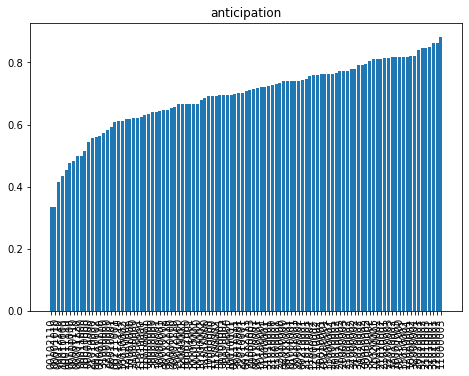

In [7]:
for i in range(8):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    names = [x[0] for x in valuewithnames[i]]
    vals = [x[1] for x in valuewithnames[i]]
    #names = display
    #vals = values[i]
    ax.bar(names, vals)
    plt.title(attributes[i])
    plt.xticks(rotation=90)
    plt.show()

In [8]:
for k in results.keys():
    for u in range(len(results[k])-1):
        results[k][u] = results[k][u]/results[k][8]
results

{'21010002': [0.8405797101449275,
  0.6304347826086957,
  0.17391304347826086,
  0.5507246376811594,
  0.16666666666666666,
  0.08695652173913043,
  0.10144927536231885,
  0.8115942028985508,
  138],
 '23000002': [0.6, 0.4, 0.2, 0.6, 0.4, 0.0, 0.4, 0.8, 5],
 '11000001': [0.6557377049180327,
  0.5081967213114754,
  0.22131147540983606,
  0.45901639344262296,
  0.22131147540983606,
  0.16393442622950818,
  0.1885245901639344,
  0.7213114754098361,
  122],
 '00130320': [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1],
 '00012310': [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1],
 '00002100': [0.6363636363636364,
  0.36363636363636365,
  0.18181818181818182,
  0.18181818181818182,
  0.2727272727272727,
  0.2727272727272727,
  0.2727272727272727,
  0.6363636363636364,
  11],
 '10001001': [0.55, 0.35, 0.3, 0.55, 0.5, 0.1, 0.15, 0.6, 20],
 '20010001': [0.7857142857142857,
  0.47619047619047616,
  0.21428571428571427,
  0.47619047619047616,
  0.13095238095238096,
  0.13095238095238096,
  0.154761904761

In [9]:
def retrieveemodist(emolastsent):
    attr = [i for i in range(8)]
    if(emolastsent in results.keys()):
        return random.choices(attr, results[emolastsent][:8], k=8)
    emokey = list(results.keys())
    mindist = 1000
    ridx = ""
    for i in range(len(emokey)):
        dist = 0
        for j in range(len(emokey[i])):
            dist += ((int(emokey[i][j])-int(emolastsent[j]))**2)**(0.5)
        if(dist<mindist):
            mindist = dist
            ridx = emokey[i]
    print("not found", ridx)
    return random.choices(attr, results[ridx][:8], k=8)

In [12]:
sorted(set(retrieveemodist('00011110')))

[0, 1, 3, 4, 6]

# Predict emotion with RNN

In [5]:
import torch
from torch import nn

In [6]:
char2int = {str(ind): ind for ind in range(4)}
char2int[' ']=4
char2int

{'0': 0, '1': 1, '2': 2, '3': 3, ' ': 4}

In [7]:
text = trainset
maxlen = len(max(text, key=len))

# Padding

# A simple loop that loops through the list of sentences and adds a ' ' whitespace until the length of
# the sentence matches the length of the longest sentence
for i in range(len(text)):
  while len(text[i])<maxlen:
      text[i] += ' '

In [8]:
input_seq = []
target_seq = []

for i in range(len(text)):
    # Remove last character for input sequence
  input_seq.append(text[i][:-1])
    
    # Remove first character for target sequence
  target_seq.append(text[i][1:])
  print("Input Sequence: {}\nTarget Sequence: {}".format(input_seq[i], target_seq[i]))

Input Sequence: 21010002 1100000
Target Sequence: 1010002 11000001
Input Sequence: 23000002 1100000
Target Sequence: 3000002 11000001
Input Sequence: 11000001 0011011
Target Sequence: 1000001 00110110
Input Sequence: 00130320 0001111
Target Sequence: 0130320 00011110
Input Sequence: 00012310 0000110
Target Sequence: 0012310 00001100
Input Sequence: 00002100 1000100
Target Sequence: 0002100 10001001
Input Sequence: 10001001 1001000
Target Sequence: 0001001 10010001
Input Sequence: 20010001 1100000
Target Sequence: 0010001 11000000
Input Sequence: 32000000 1000000
Target Sequence: 2000000 10000000
Input Sequence: 20000000 0000011
Target Sequence: 0000000 00000110
Input Sequence: 00000120 0000001
Target Sequence: 0000120 00000010
Input Sequence: 00000020 1111111
Target Sequence: 0000020 11111111
Input Sequence: 11112111 1000001
Target Sequence: 1112111 10000010
Input Sequence: 10000010 1001000
Target Sequence: 0000010 10010000
Input Sequence: 20010000 1000000
Target Sequence: 0010000 1000

In [9]:
for i in range(len(text)):
    input_seq[i] = [char2int[character] for character in input_seq[i]]
    target_seq[i] = [char2int[character] for character in target_seq[i]]

In [10]:
dict_size = len(char2int)
seq_len = maxlen - 1
batch_size = len(text)

def one_hot_encode(sequence, dict_size, seq_len, batch_size):
    # Creating a multi-dimensional array of zeros with the desired output shape
    features = np.zeros((batch_size, seq_len, dict_size), dtype=np.float32)
    
    # Replacing the 0 at the relevant character index with a 1 to represent that character
    for i in range(batch_size):
        for u in range(seq_len):
            features[i, u, sequence[i][u]] = 1
    return features

In [11]:
input_seq = one_hot_encode(input_seq, dict_size, seq_len, batch_size)

In [12]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [13]:
input_seq = torch.from_numpy(input_seq).to(device)
target_seq = torch.Tensor(target_seq)

In [14]:
input_seq.is_cuda

True

In [67]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)

        # Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden)
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(device)
        return hidden

In [74]:
model = Model(input_size=dict_size, output_size=dict_size, hidden_dim=20, n_layers=3)
# We'll also set the model to the device that we defined earlier (default is CPU)
model.to(device)

# Define hyperparameters
n_epochs = 1000
lr=0.01

# Define Loss, Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [75]:
# Training Run
model.train()
for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() # Clears existing gradients from previous epoch
    output, hidden = model(input_seq)
    loss = criterion(output, target_seq.view(-1).long().to(device))
    loss.backward() # Does backpropagation and calculates gradients
    optimizer.step() # Updates the weights accordingly
    
    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/1000............. Loss: 1.0839
Epoch: 20/1000............. Loss: 1.0679
Epoch: 30/1000............. Loss: 1.0474
Epoch: 40/1000............. Loss: 1.0212
Epoch: 50/1000............. Loss: 0.9687
Epoch: 60/1000............. Loss: 0.9159
Epoch: 70/1000............. Loss: 0.8279
Epoch: 80/1000............. Loss: 0.7521
Epoch: 90/1000............. Loss: 0.7097
Epoch: 100/1000............. Loss: 0.6663
Epoch: 110/1000............. Loss: 0.6373
Epoch: 120/1000............. Loss: 0.6184
Epoch: 130/1000............. Loss: 0.6059
Epoch: 140/1000............. Loss: 0.6006
Epoch: 150/1000............. Loss: 0.5977
Epoch: 160/1000............. Loss: 0.5942
Epoch: 170/1000............. Loss: 0.5922
Epoch: 180/1000............. Loss: 0.5906
Epoch: 190/1000............. Loss: 0.5892
Epoch: 200/1000............. Loss: 0.5881
Epoch: 210/1000............. Loss: 0.5869
Epoch: 220/1000............. Loss: 0.5861
Epoch: 230/1000............. Loss: 0.5850
Epoch: 240/1000............. Loss: 0.5845
E

In [76]:
def predict(model, character):
    # One-hot encoding our input to fit into the model
    character = np.array([[char2int[c] for c in character]])
    character = one_hot_encode(character, dict_size, character.shape[1], 1)
    character = torch.from_numpy(character).to(device)
    out, hidden = model(character)

    prob = nn.functional.softmax(out[-1], dim=0).data
    # Taking the class with the highest probability score from the output
    char_ind = torch.max(prob, dim=0)[1].item()

    return int2char[char_ind], hidden

In [77]:
def sample(model, out_len, start):
    model.eval() # eval mode
    start = start.lower()
    # First off, run through the starting characters
    chars = [ch for ch in start]
    size = out_len - len(chars)
    # Now pass in the previous characters and get a new one
    for i in range(size):
        char, h = predict(model, chars)
        chars.append(char)

    return ''.join(chars)

In [78]:
sample(model, 8, '22020002 ')

'22020002 '